### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [1]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots_safety as makeplots
import pickle
import MAIN_config_hour_of_day as config
from scipy.stats.stats import linregress
#import MAIN_config_season as config

External files

In [2]:
dir_names=config.dirnames
curvefigfile="curve_compare_safety.png"
scatterfigfile="scatter_compare_safety.png"

In [3]:
TradeoffDict={}
for d,dirname in enumerate(dir_names):
    dataName=dirname+"/data.p"
    windowname=config.windower(d).name
    dataName=dirname+"/data.p"
    data=pickle.load(open(dataName,"rb"))
    TradeoffDict[windowname]=makeplots.tradeoff(data)

Manhattan whole day
Manhattan evening and morning
Manhattan morning rush hour
Manhattan midday
Manhattan evening rush hour


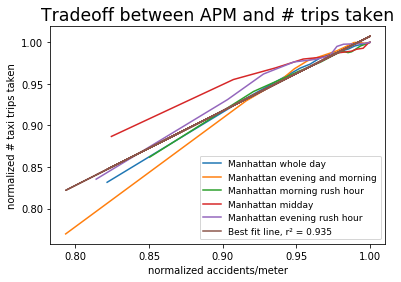

In [7]:
x_pts = []
y_pts = []

plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    points=tradeoff.curve()
    x_pts = x_pts + [pt for pt in points["rel_APM"]]
    y_pts = y_pts + [pt for pt in points["rel_trips"]]
    #print("points: "+str(points))
    plotter.plot(points["rel_APM"],points["rel_trips"],label=windowname)
    
x_pts = numpy.array(x_pts)
y_pts = numpy.array(y_pts)
slope, intercept, r_value, p_value, std_err = linregress(x_pts, y_pts)

plotter.plot(x_pts,slope*x_pts + intercept,label ="Best fit line, r² = {:.3f}".format(r_value**2))
#plotter.xlim(0.9,)
#plotter.ylim(0.9,)
plotter.title("Tradeoff between APM and # trips taken",fontsize='xx-large')
plotter.ylabel("normalized # taxi trips taken",fontsize='medium')
plotter.xlabel("normalized accidents/meter",fontsize='medium')
plotter.legend(loc=0,prop={'size':9})
plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(numpy.array(x_pts), numpy.array(y_pts))

print(r_value**2)

0.9347126449391283


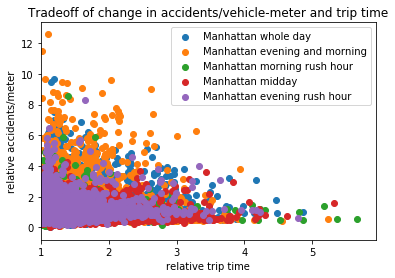

In [9]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_APVM"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("Tradeoff of change in accidents/vehicle-meter and trip time")
plotter.xlabel("relative trip time")
plotter.ylabel("relative accidents/meter")
plotter.legend()
plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()